In [29]:
import json
from pyvis.network import Network
import matplotlib.pyplot as plt
import seaborn as sns


# Function to load course data from JSON and create a Pyvis graph
def create_course_graph(json_file, output_html):
    # Load the JSON data
    with open(json_file, 'r') as file:
        course_data = json.load(file)

    # Initialize the Pyvis network as a directed graph
    net = Network(notebook=False, height="750px", width="100%", directed=True)

    # Add all courses as nodes
    for course, details in course_data.items():
        net.add_node(course, label=details['title'], title=f"Course: {course}")

    # Add edges for prerequisites
    for course, details in course_data.items():
        for prereq in details.get('prerequisites', []):
            # Add missing prerequisite nodes
            if not any(node['id'] == prereq for node in net.nodes):
                net.add_node(prereq, label=f"Prerequisite: {prereq}", title=f"Prerequisite: {prereq}")
            net.add_edge(prereq, course)

    # Customize appearance
    net.repulsion(node_distance=200, spring_length=200)

    # Save the graph to an HTML file
    net.write_html(output_html)

    return net


# Path to the JSON file
json_file = "cs_courses.json"  # Update with the correct path if needed
output_html = "cs_graph.html"

# Generate the course graph
net = create_course_graph(json_file, output_html)


In [30]:
# Path to the JSON file
json_file = "econ_courses.json"  # Update with the correct path if needed
output_html = "econ_graph.html"

# Generate the course graph
net = create_course_graph(json_file, output_html)


In [42]:
# Function to find the longest path in the entire graph
def find_unique_longest_paths_in_graph(net):
    def dfs(current_node, visited, path):
        visited.add(current_node)
        path.append(current_node)

        if len(path) >= len(longest_paths[0]):
            if len(path) > len(longest_paths[0]):
                longest_paths.clear()
            if path not in longest_paths:
                longest_paths.append(list(path))

        for edge in net.edges:
            if edge['from'] == current_node and edge['to'] not in visited:
                dfs(edge['to'], visited, path)

        path.pop()
        visited.remove(current_node)

    longest_paths = [[]]

    for node in net.nodes:
        dfs(node['id'], set(), [])

    print("Unique Longest Paths in the Graph:")
    for path in longest_paths:
        print("Path:")
        for node in path:
            course_title = next((n['label'] for n in net.nodes if n['id'] == node), node)
            print(f"{node} - {course_title}")
        print()

find_unique_longest_paths_in_graph(net)

Unique Longest Paths in the Graph:
Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.1020 - Software Construction
6.1060 - Software Performance Engineering
6.5060 - Algorithm Engineering

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.1020 - Software Construction
6.1100 - Computer Language Engineering
6.5110 - Foundations of Program Analysis

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.3900 - Introduction to Machine Learning
6.8611 - Quantitative Methods for Natural Language Processing (Graduate)
6.7930 - Machine Learning for Healthcare

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1210 - Introduction to Algorithms
6.1220 - Design and Analysis of Algorithms
6.5210 - Advanced Algorithms
6.5220 - Randomized Algorithms

Path:
6.100A - Introduction to Computer Science Programming 

In [43]:
# Function to sort and print courses by number of outgoing edges
def text_sort_print(net):
    outgoing_edges = {node['id']: 0 for node in net.nodes}

    for edge in net.edges:
        outgoing_edges[edge['from']] += 1

    # Sort courses by number of outgoing edges
    sorted_courses = sorted(outgoing_edges.items(), key=lambda x: x[1], reverse=True)
    print("Courses sorted by number of outgoing edges:")
    for course, count in sorted_courses:
        course_title = next((node['label'] for node in net.nodes if node['id'] == course), course)
        print(f"{course_title}: {count} outgoing edges")

    # Find the node with the most incoming edges
    incoming_edges = {node['id']: 0 for node in net.nodes}
    for edge in net.edges:
        incoming_edges[edge['to']] += 1

    max_incoming = max(incoming_edges.items(), key=lambda x: x[1])
    max_incoming_title = next((node['label'] for node in net.nodes if node['id'] == max_incoming[0]), max_incoming[0])
    print(f"Node with the most incoming edges: {max_incoming_title} ({max_incoming[1]} incoming edges)")


sort_and_print_outgoing_edges(net)



NameError: name 'sort_and_print_outgoing_edges' is not defined

In [33]:
#do the same for econ courses
json_file = "econ_courses.json"  # Update with the correct path if needed
output_html = "econ_graph.html"

# Generate the course graph
net = create_course_graph(json_file, output_html)

find_unique_longest_paths_in_graph(net)
sort_and_print_outgoing_edges(net)

Unique Longest Paths in the Graph:
Path:
14.01 - Principles of Microeconomics
14.04 - Intermediate Microeconomic Theory
14.121 - Microeconomic Theory I
14.122 - Microeconomic Theory II
14.123 - Microeconomic Theory III
14.124 - Microeconomic Theory IV
14.282 - Introduction to Organizational Economics
14.283 - Advanced Topics in Organizational Economics I

Path:
14.01 - Principles of Microeconomics
14.04 - Intermediate Microeconomic Theory
14.121 - Microeconomic Theory I
14.122 - Microeconomic Theory II
14.123 - Microeconomic Theory III
14.124 - Microeconomic Theory IV
14.282 - Introduction to Organizational Economics
14.284 - Advanced Topics in Organizational Economics II

Path:
Calculus II (GIR) - Prerequisite: Calculus II (GIR)
14.04 - Intermediate Microeconomic Theory
14.121 - Microeconomic Theory I
14.122 - Microeconomic Theory II
14.123 - Microeconomic Theory III
14.124 - Microeconomic Theory IV
14.282 - Introduction to Organizational Economics
14.283 - Advanced Topics in Organiza

NameError: name 'sort_and_print_outgoing_edges' is not defined

In [34]:

# sort_and_print_outgoing_edges(net)



In [35]:
json_file = "cs_courses.json"
output_html = "cs_graph.html"
net = create_course_graph(json_file, output_html)
find_unique_longest_paths_in_graph(net)
sort_and_print_outgoing_edges(net)


Unique Longest Paths in the Graph:
Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.1020 - Software Construction
6.1060 - Software Performance Engineering
6.5060 - Algorithm Engineering

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.1020 - Software Construction
6.1100 - Computer Language Engineering
6.5110 - Foundations of Program Analysis

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.3900 - Introduction to Machine Learning
6.8611 - Quantitative Methods for Natural Language Processing (Graduate)
6.7930 - Machine Learning for Healthcare

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1210 - Introduction to Algorithms
6.1220 - Design and Analysis of Algorithms
6.5210 - Advanced Algorithms
6.5220 - Randomized Algorithms

Path:
6.100A - Introduction to Computer Science Programming 

NameError: name 'sort_and_print_outgoing_edges' is not defined

In [44]:
import json
from pyvis.network import Network

def create_tree_graph(json_file, output_html):
    # Load the JSON data
    with open(json_file, 'r') as file:
        course_data = json.load(file)

    # Initialize the Pyvis network with directed graph
    net = Network(notebook=False, height="750px", width="100%", directed=True)

    # Add all courses as nodes
    for course, details in course_data.items():
        net.add_node(course, label=details['title'], title=f"Course: {course}")

    # Add edges for prerequisites
    for course, details in course_data.items():
        for prereq in details.get('prerequisites', []):
            if not any(node['id'] == prereq for node in net.nodes):
                net.add_node(prereq, label=f"Prerequisite: {prereq}", title=f"Prerequisite: {prereq}")
            net.add_edge(prereq, course)

    # Enhanced options for better node spacing
    net.set_options("""{
        "layout": {
            "hierarchical": {
                "enabled": true,
                "direction": "UD",
                "sortMethod": "directed",
                "nodeSpacing": 200,
                "levelSeparation": 300,
                "treeSpacing": 250,
                "blockShifting": true,
                "edgeMinimization": true,
                "parentCentralization": true
            }
        },
        "physics": {
            "enabled": true,
            "hierarchicalRepulsion": {
                "nodeDistance": 400,
                "centralGravity": 0.02,
                "springConstant": 0.001,
                "damping": 0.2
            },
            "stabilization": {
                "enabled": true,
                "iterations": 2000,
                "updateInterval": 50
            },
            "minVelocity": 0.01,
            "solver": "hierarchicalRepulsion"
        },
        "edges": {
            "smooth": {
                "type": "cubicBezier",
                "forceDirection": "vertical"
            }
        }
    }""")

    net.write_html(output_html)
    return net


# Path to the JSON file
json_file = "cs_courses.json"  # Update with the correct path if needed
output_html = "Graphs/cs_final_graph.html"

# Generate the course graph
net = create_tree_graph(json_file, output_html)

/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_26568/571552697.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=outgoing_counts, y=course_titles, palette="viridis", saturation=1.0, edgecolor='none', ci=None)
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_26568/571552697.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outgoing_counts, y=course_titles, palette="viridis", saturation=1.0, edgecolor='none', ci=None)


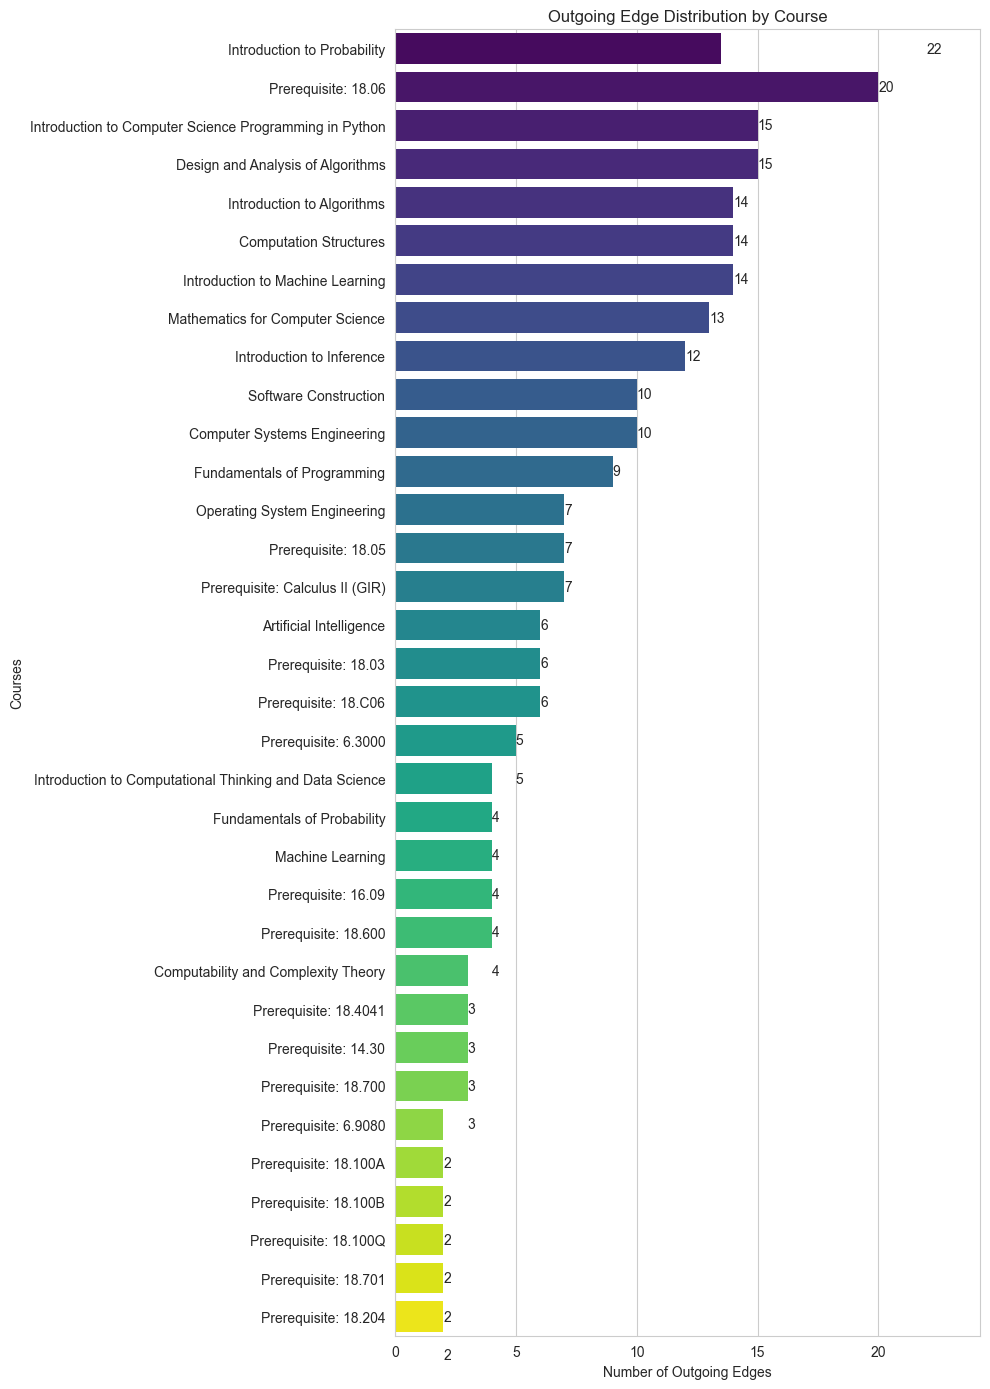

In [50]:
def graph_outgoing_edges(net):
    # Calculate outgoing edges for each node
    outgoing_edges = {node['id']: 0 for node in net.nodes}
    
    for edge in net.edges:
        outgoing_edges[edge['from']] += 1
    
    # Filter out nodes with 0 outgoing edges
    outgoing_edges = {k: v for k, v in outgoing_edges.items() if v > 1}
    
    # Sort courses by number of outgoing edges
    sorted_courses = sorted(outgoing_edges.items(), key=lambda x: x[1], reverse=True)
    
    course_titles = []
    outgoing_counts = []
    for course, count in sorted_courses:
        course_title = next((node['label'] for node in net.nodes if node['id'] == course), course)
        course_titles.append(course_title)
        outgoing_counts.append(count)
    
    # Visualization

    plt.figure(figsize=(10, max(6, len(sorted_courses) * 0.4)))
    plt.xlim(0, max(outgoing_counts) + 0.5)  # Add padding
    plt.gca().set_xlim(right=max(outgoing_counts) * 1.1)  # Ensure the axis 
    sns.set_style("whitegrid")
    
    sns.barplot(x=outgoing_counts, y=course_titles, palette="viridis", saturation=1.0, edgecolor='none', ci=None)
    
    plt.xlabel('Number of Outgoing Edges')
    plt.ylabel('Courses')
    plt.title('Outgoing Edge Distribution by Course')
    
    # Annotate bars with counts
    for index, value in enumerate(outgoing_counts):
        plt.text(value, index, str(value), va='center')
    
    plt.tight_layout()
    plt.show()


graph_outgoing_edges(net)


/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_26568/3115763098.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=outgoing_counts, y=course_titles, palette="viridis", saturation=1.0, edgecolor='none', ci=None)
/var/folders/lp/hk0h_6g94b59251kmlwhp32h0000gn/T/ipykernel_26568/3115763098.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outgoing_counts, y=course_titles, palette="viridis", saturation=1.0, edgecolor='none', ci=None)


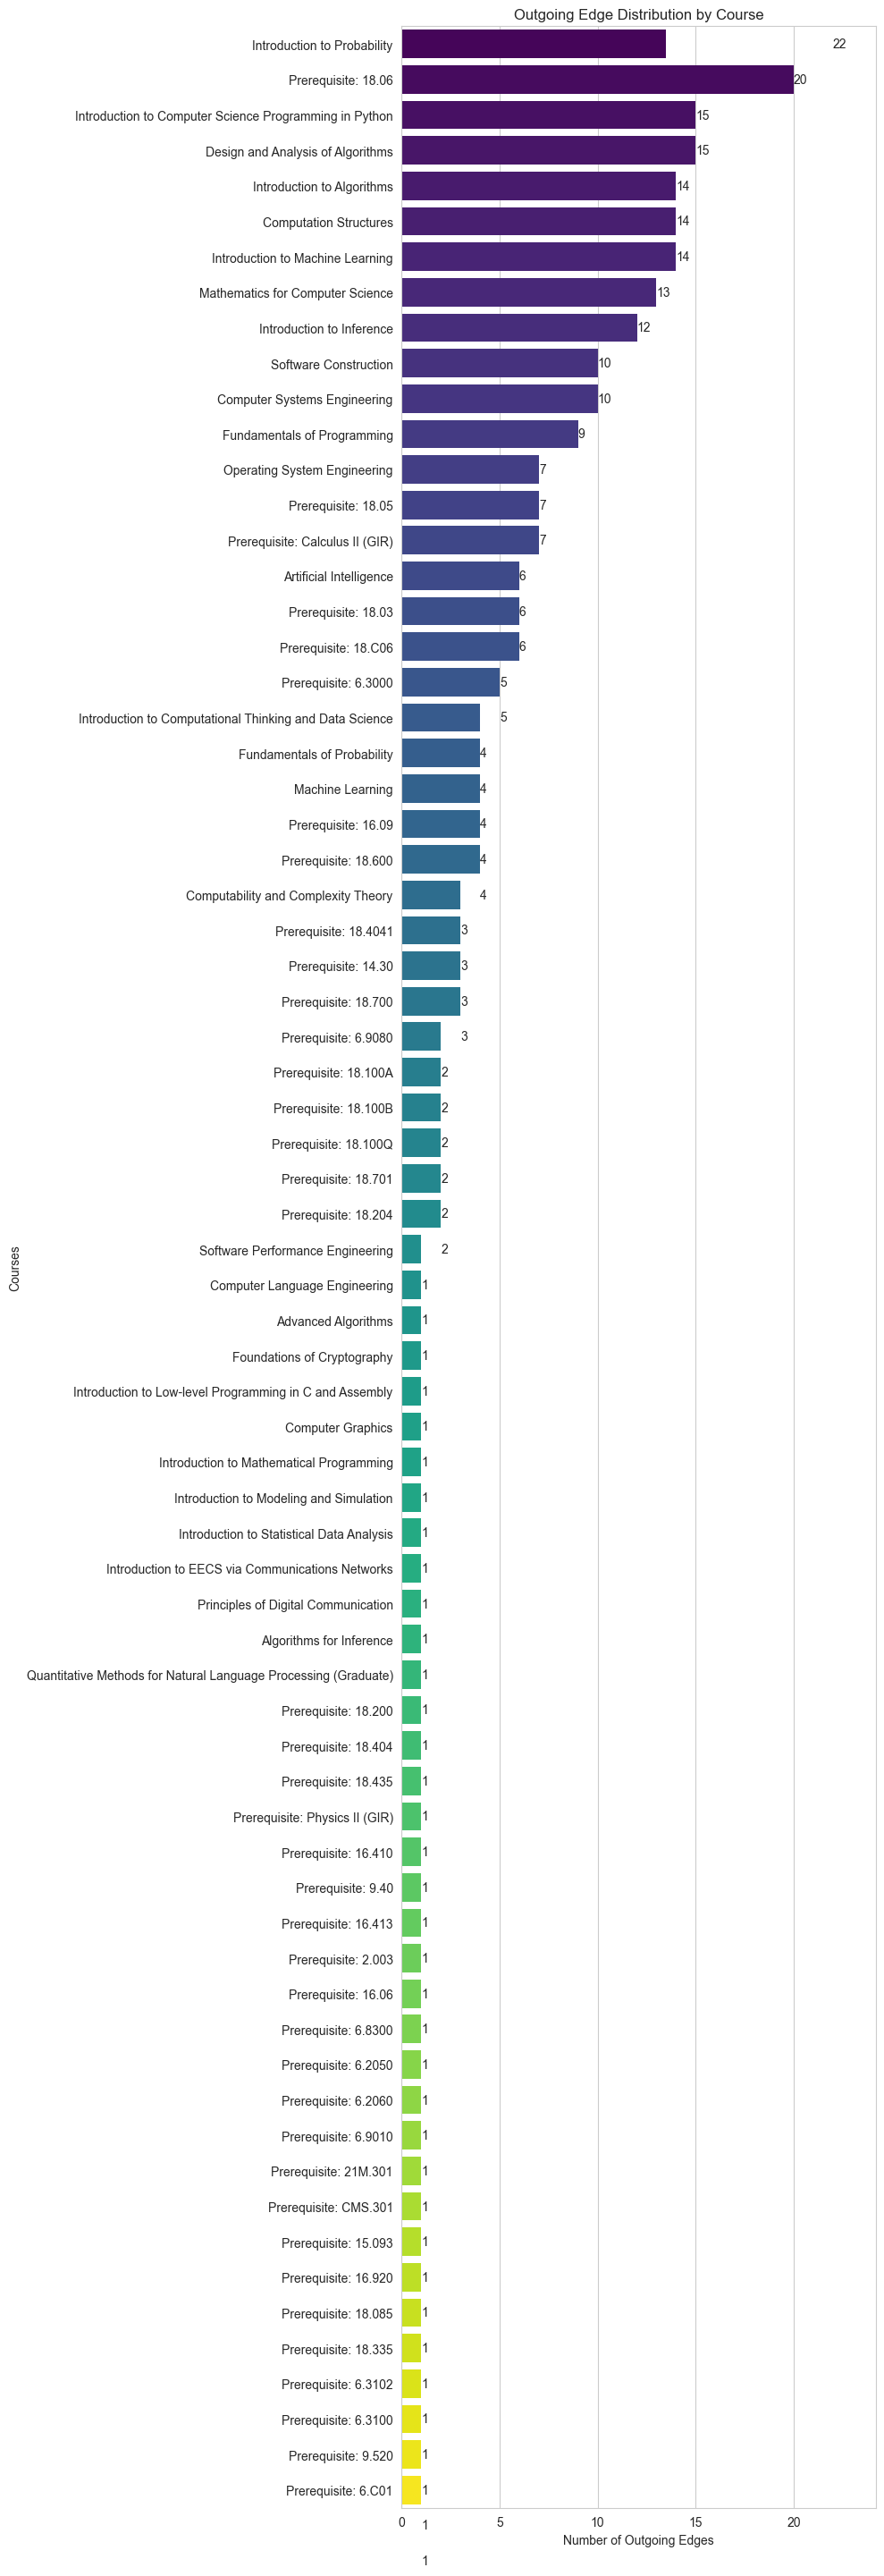

In [38]:
def graph_outgoing_edges(net):
    # Calculate outgoing edges for each node
    outgoing_edges = {node['id']: 0 for node in net.nodes}
    
    for edge in net.edges:
        outgoing_edges[edge['from']] += 1
    
    # Filter out nodes with 0 outgoing edges
    outgoing_edges = {k: v for k, v in outgoing_edges.items() if v > 0}
    
    # Sort courses by number of outgoing edges
    sorted_courses = sorted(outgoing_edges.items(), key=lambda x: x[1], reverse=True)
    
    course_titles = []
    outgoing_counts = []
    for course, count in sorted_courses:
        course_title = next((node['label'] for node in net.nodes if node['id'] == course), course)
        course_titles.append(course_title)
        outgoing_counts.append(count)
    
    # Visualization
    plt.figure(figsize=(10, max(6, len(sorted_courses) * 0.4)))
    sns.set_style("whitegrid")
    
    # Create the barplot first
    sns.barplot(x=outgoing_counts, y=course_titles, palette="viridis", saturation=1.0, edgecolor='none', ci=None)
    
    # Then set the x-axis limits
    plt.gca().set_xlim(0, max(outgoing_counts) * 1.1)
    
    plt.xlabel('Number of Outgoing Edges')
    plt.ylabel('Courses')
    plt.title('Outgoing Edge Distribution by Course')
    
    # Annotate bars with counts
    for index, value in enumerate(outgoing_counts):
        plt.text(value, index, str(value), va='center')
    
    plt.tight_layout()
    plt.show()


graph_outgoing_edges(net)


In [64]:
import matplotlib.pyplot as plt
import numpy as np

def proper_graph_outgoing_edges(net):
    """
    Creates a horizontal bar chart showing the distribution of outgoing edges for each node in the network.
    Displays largest values at the top, smallest at the bottom.
    
    Args:
        net: Network object containing nodes and edges
    """
    # Calculate outgoing edges for each node
    outgoing_edges = {node['id']: 0 for node in net.nodes}
    
    for edge in net.edges:
        outgoing_edges[edge['from']] += 1
    
    # Filter out nodes with 0 outgoing edges and sort by count
    outgoing_edges = {k: v for k, v in outgoing_edges.items() if v > 0}
    # Sort in ascending order for bottom-to-top display
    sorted_courses = sorted(outgoing_edges.items(), key=lambda x: x[1])
    
    # Get course titles and counts
    course_titles = []
    outgoing_counts = []
    for course, count in sorted_courses:
        course_title = next((node['label'] for node in net.nodes if node['id'] == course), course)
        # Truncate long course titles
        if len(course_title) > 40:
            course_title = course_title[:37] + '...'
        course_titles.append(course_title)
        outgoing_counts.append(count)
    
    # Calculate figure size based on number of courses
    height_per_course = 0.4  # Minimum height per course
    min_height = 6
    fig_height = max(min_height, len(sorted_courses) * height_per_course)
    
    # Create figure with adjusted size
    plt.figure(figsize=(12, fig_height))
    
    # Create positions for bars (reversed order)
    y_pos = np.arange(len(course_titles))
    
    # Create color gradient using viridis colormap (reversed to match data order)
    colors = plt.cm.viridis(np.linspace(0.9, 0.2, len(outgoing_counts)))
    
    # Create horizontal bar plot
    bars = plt.barh(y_pos, outgoing_counts, color=colors, edgecolor='none')
    
    # Customize the plot
    plt.xlabel('Number of Outgoing Prerequisites', fontsize=10, labelpad=10)
    plt.ylabel('Courses', fontsize=10, labelpad=10)
    plt.title('Course Prerequisite Distribution', fontsize=12, pad=20)
    
    # Set y-axis ticks and labels
    plt.yticks(y_pos, course_titles, fontsize=12)
    
    # Add grid with light color
    plt.grid(axis='x', linestyle='--', alpha=0.3, color='gray', zorder=0)
    
    # Annotate bars with counts
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f' {int(width)}',
                va='center', fontsize=16)
    # Adjust layout and margins
    plt.margins(y=0.01)
    plt.tight_layout()
    
    return plt.gcf()

# Example usage:
# fig = proper_graph_outgoing_edges(cs_net)
# plt.show()

Unique Longest Paths in the Graph:
Path:
8.01 - Physics I
8.02 - Physics II
8.03 - Physics III
8.04 - Quantum Physics I
8.05 - Quantum Physics II
8.321 - Quantum Theory I
8.322 - Quantum Theory II
8.324 - Relativistic Quantum Field Theory II
8.325 - Relativistic Quantum Field Theory III

Path:
8.01 - Physics I
8.02 - Physics II
8.03 - Physics III
8.04 - Quantum Physics I
8.05 - Quantum Physics II
8.321 - Quantum Theory I
8.322 - Quantum Theory II
8.324 - Relativistic Quantum Field Theory II
8.821 - String Theory

Path:
8.01 - Physics I
8.02 - Physics II
8.03 - Physics III
8.04 - Quantum Physics I
8.05 - Quantum Physics II
8.321 - Quantum Theory I
8.323 - Relativistic Quantum Field Theory I
8.324 - Relativistic Quantum Field Theory II
8.325 - Relativistic Quantum Field Theory III

Path:
8.01 - Physics I
8.02 - Physics II
8.03 - Physics III
8.04 - Quantum Physics I
8.05 - Quantum Physics II
8.321 - Quantum Theory I
8.323 - Relativistic Quantum Field Theory I
8.324 - Relativistic Quantum 

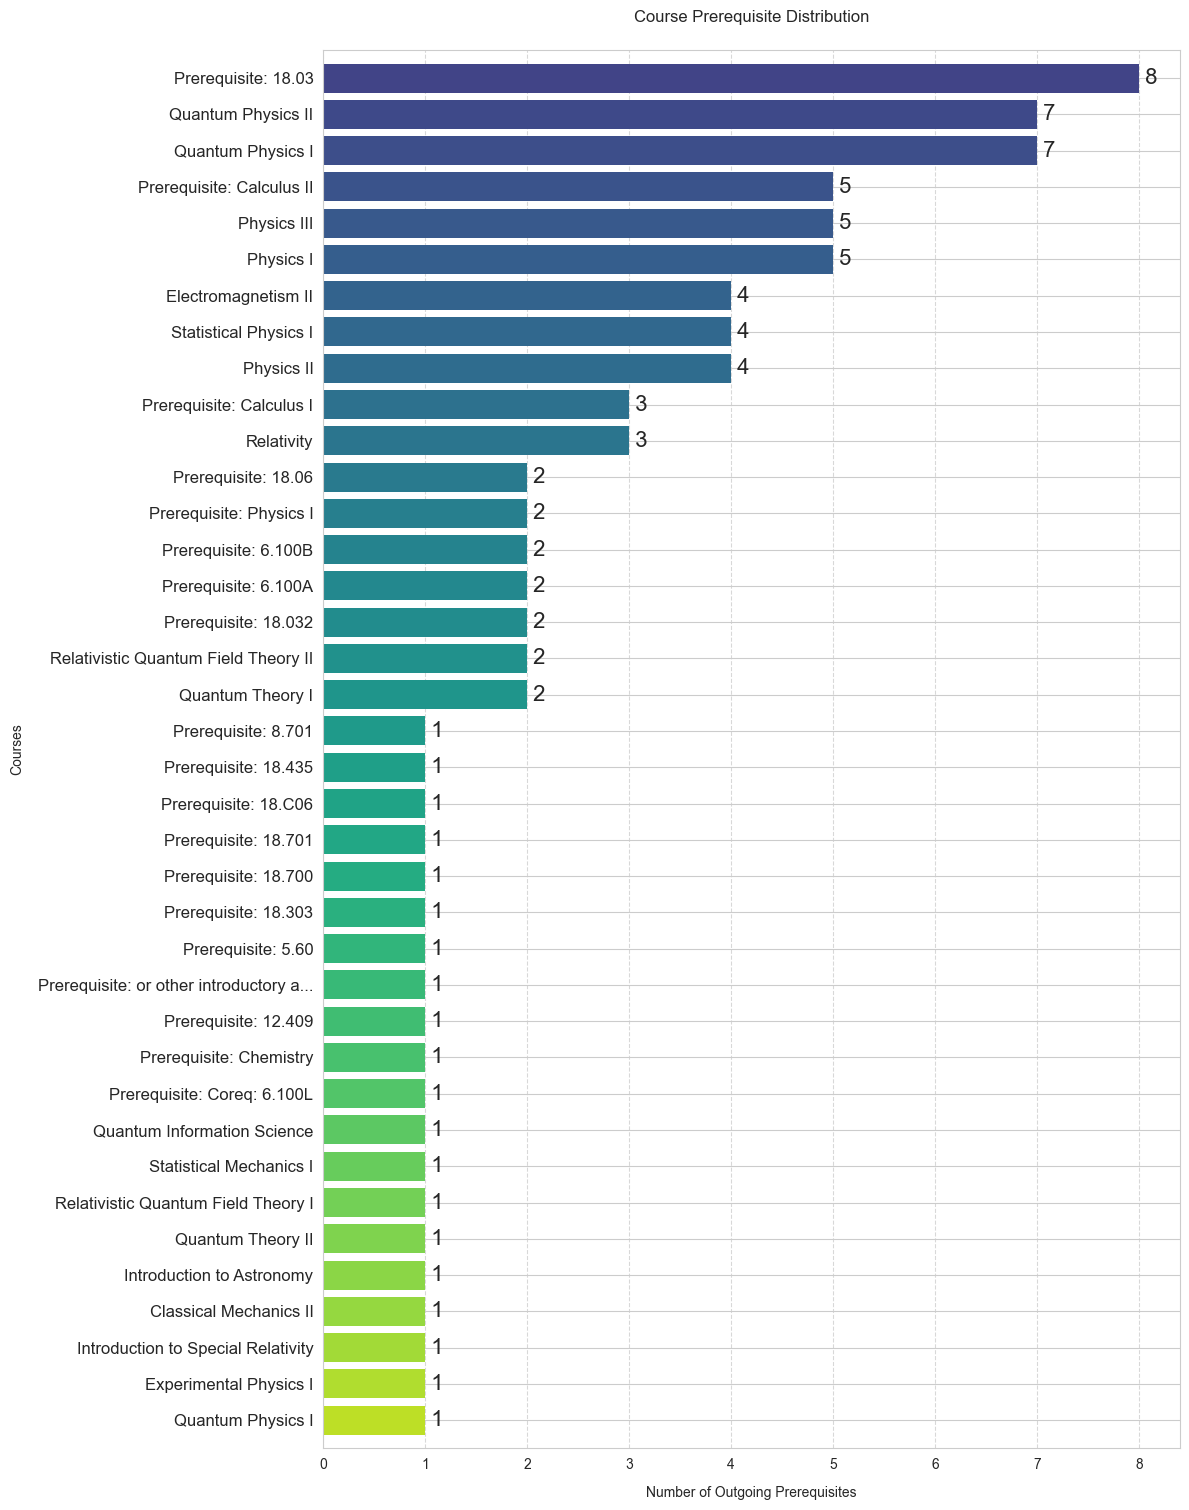

In [65]:
#do analysis of physics courses
json_file = "physics_courses.json"  # Update with the correct path if needed
output_html = "Graphs/physics_graph.html"
# Generate the course graph
physics_net = create_course_graph(json_file, output_html)
find_unique_longest_paths_in_graph(physics_net)

#make tree graph 
json_file = "physics_courses.json"  # Update with the correct path if needed
output_html = "Graphs/physics_tree_graph.html"
# Generate the course graph
physics_net = create_tree_graph(json_file, output_html)

# graph_outgoing_edges(physics_net)
fig = proper_graph_outgoing_edges(physics_net)
plt.show()

Unique Longest Paths in the Graph:
Path:
14.01 - Principles of Microeconomics
14.04 - Intermediate Microeconomic Theory
14.121 - Microeconomic Theory I
14.122 - Microeconomic Theory II
14.123 - Microeconomic Theory III
14.124 - Microeconomic Theory IV
14.282 - Introduction to Organizational Economics
14.283 - Advanced Topics in Organizational Economics I

Path:
14.01 - Principles of Microeconomics
14.04 - Intermediate Microeconomic Theory
14.121 - Microeconomic Theory I
14.122 - Microeconomic Theory II
14.123 - Microeconomic Theory III
14.124 - Microeconomic Theory IV
14.282 - Introduction to Organizational Economics
14.284 - Advanced Topics in Organizational Economics II

Path:
Calculus II (GIR) - Prerequisite: Calculus II (GIR)
14.04 - Intermediate Microeconomic Theory
14.121 - Microeconomic Theory I
14.122 - Microeconomic Theory II
14.123 - Microeconomic Theory III
14.124 - Microeconomic Theory IV
14.282 - Introduction to Organizational Economics
14.283 - Advanced Topics in Organiza

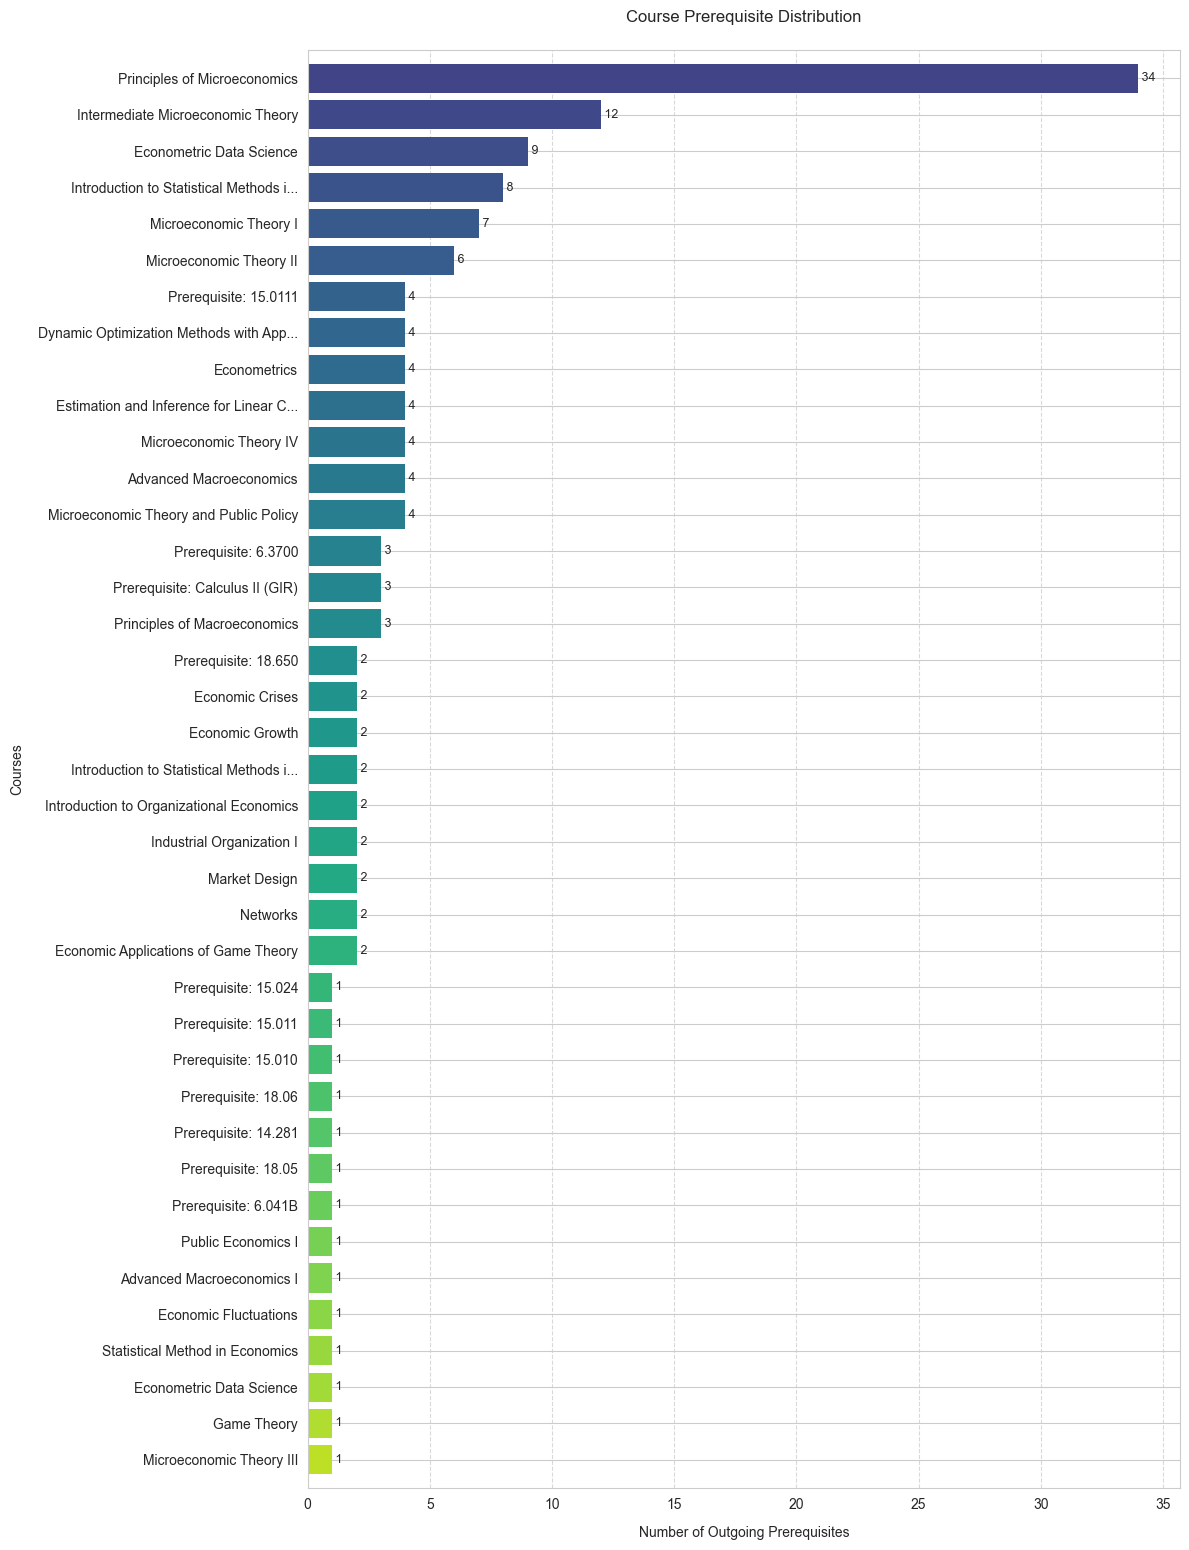

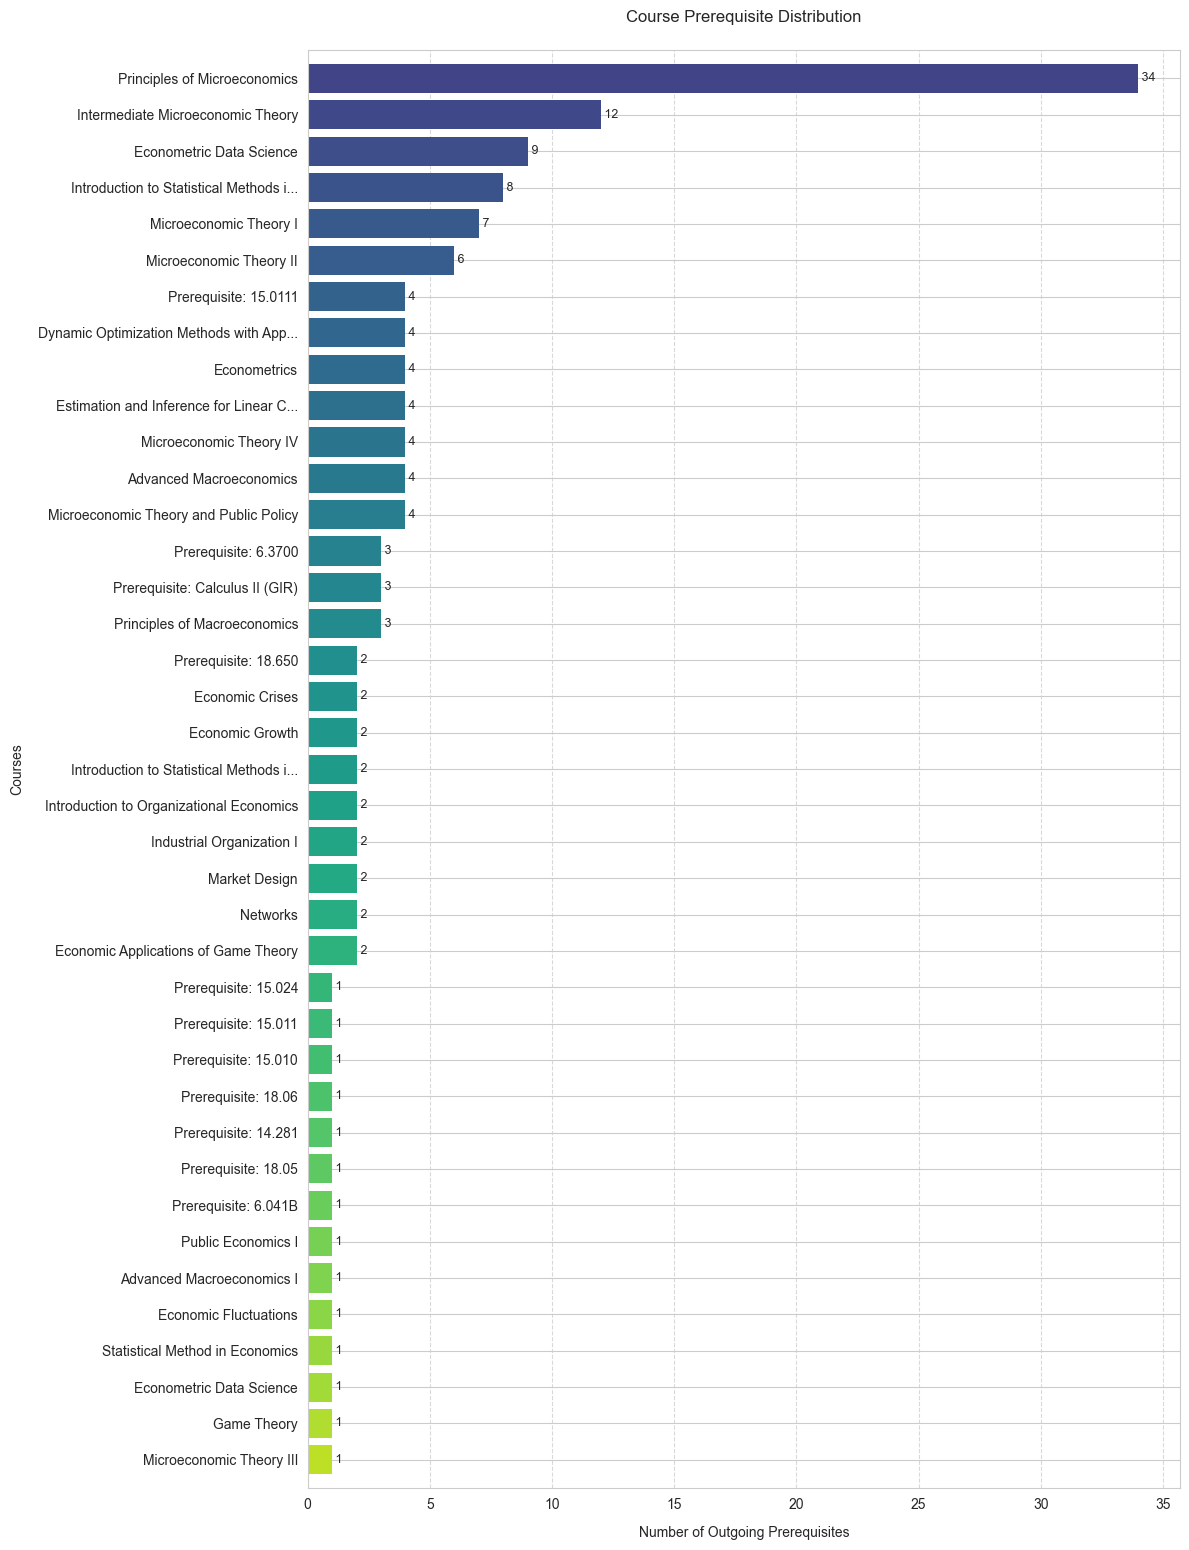

In [67]:
#do analysis of economics courses
json_file = "econ_courses.json"  # Update with the correct path if needed
output_html = "Graphs/econ_graph.html"
# Generate the course graph
econ_net = create_course_graph(json_file, output_html)
find_unique_longest_paths_in_graph(econ_net)

#make tree graph
json_file = "econ_courses.json"  # Update with the correct path if needed
output_html = "Graphs/econ_tree_graph.html"
# Generate the course graph
econ_net = create_tree_graph(json_file, output_html)

graph_outgoing_edges(econ_net)


Unique Longest Paths in the Graph:
Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.1020 - Software Construction
6.1060 - Software Performance Engineering
6.5060 - Algorithm Engineering

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.1020 - Software Construction
6.1100 - Computer Language Engineering
6.5110 - Foundations of Program Analysis

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1010 - Fundamentals of Programming
6.3900 - Introduction to Machine Learning
6.8611 - Quantitative Methods for Natural Language Processing (Graduate)
6.7930 - Machine Learning for Healthcare

Path:
6.100A - Introduction to Computer Science Programming in Python
6.1210 - Introduction to Algorithms
6.1220 - Design and Analysis of Algorithms
6.5210 - Advanced Algorithms
6.5220 - Randomized Algorithms

Path:
6.100A - Introduction to Computer Science Programming 

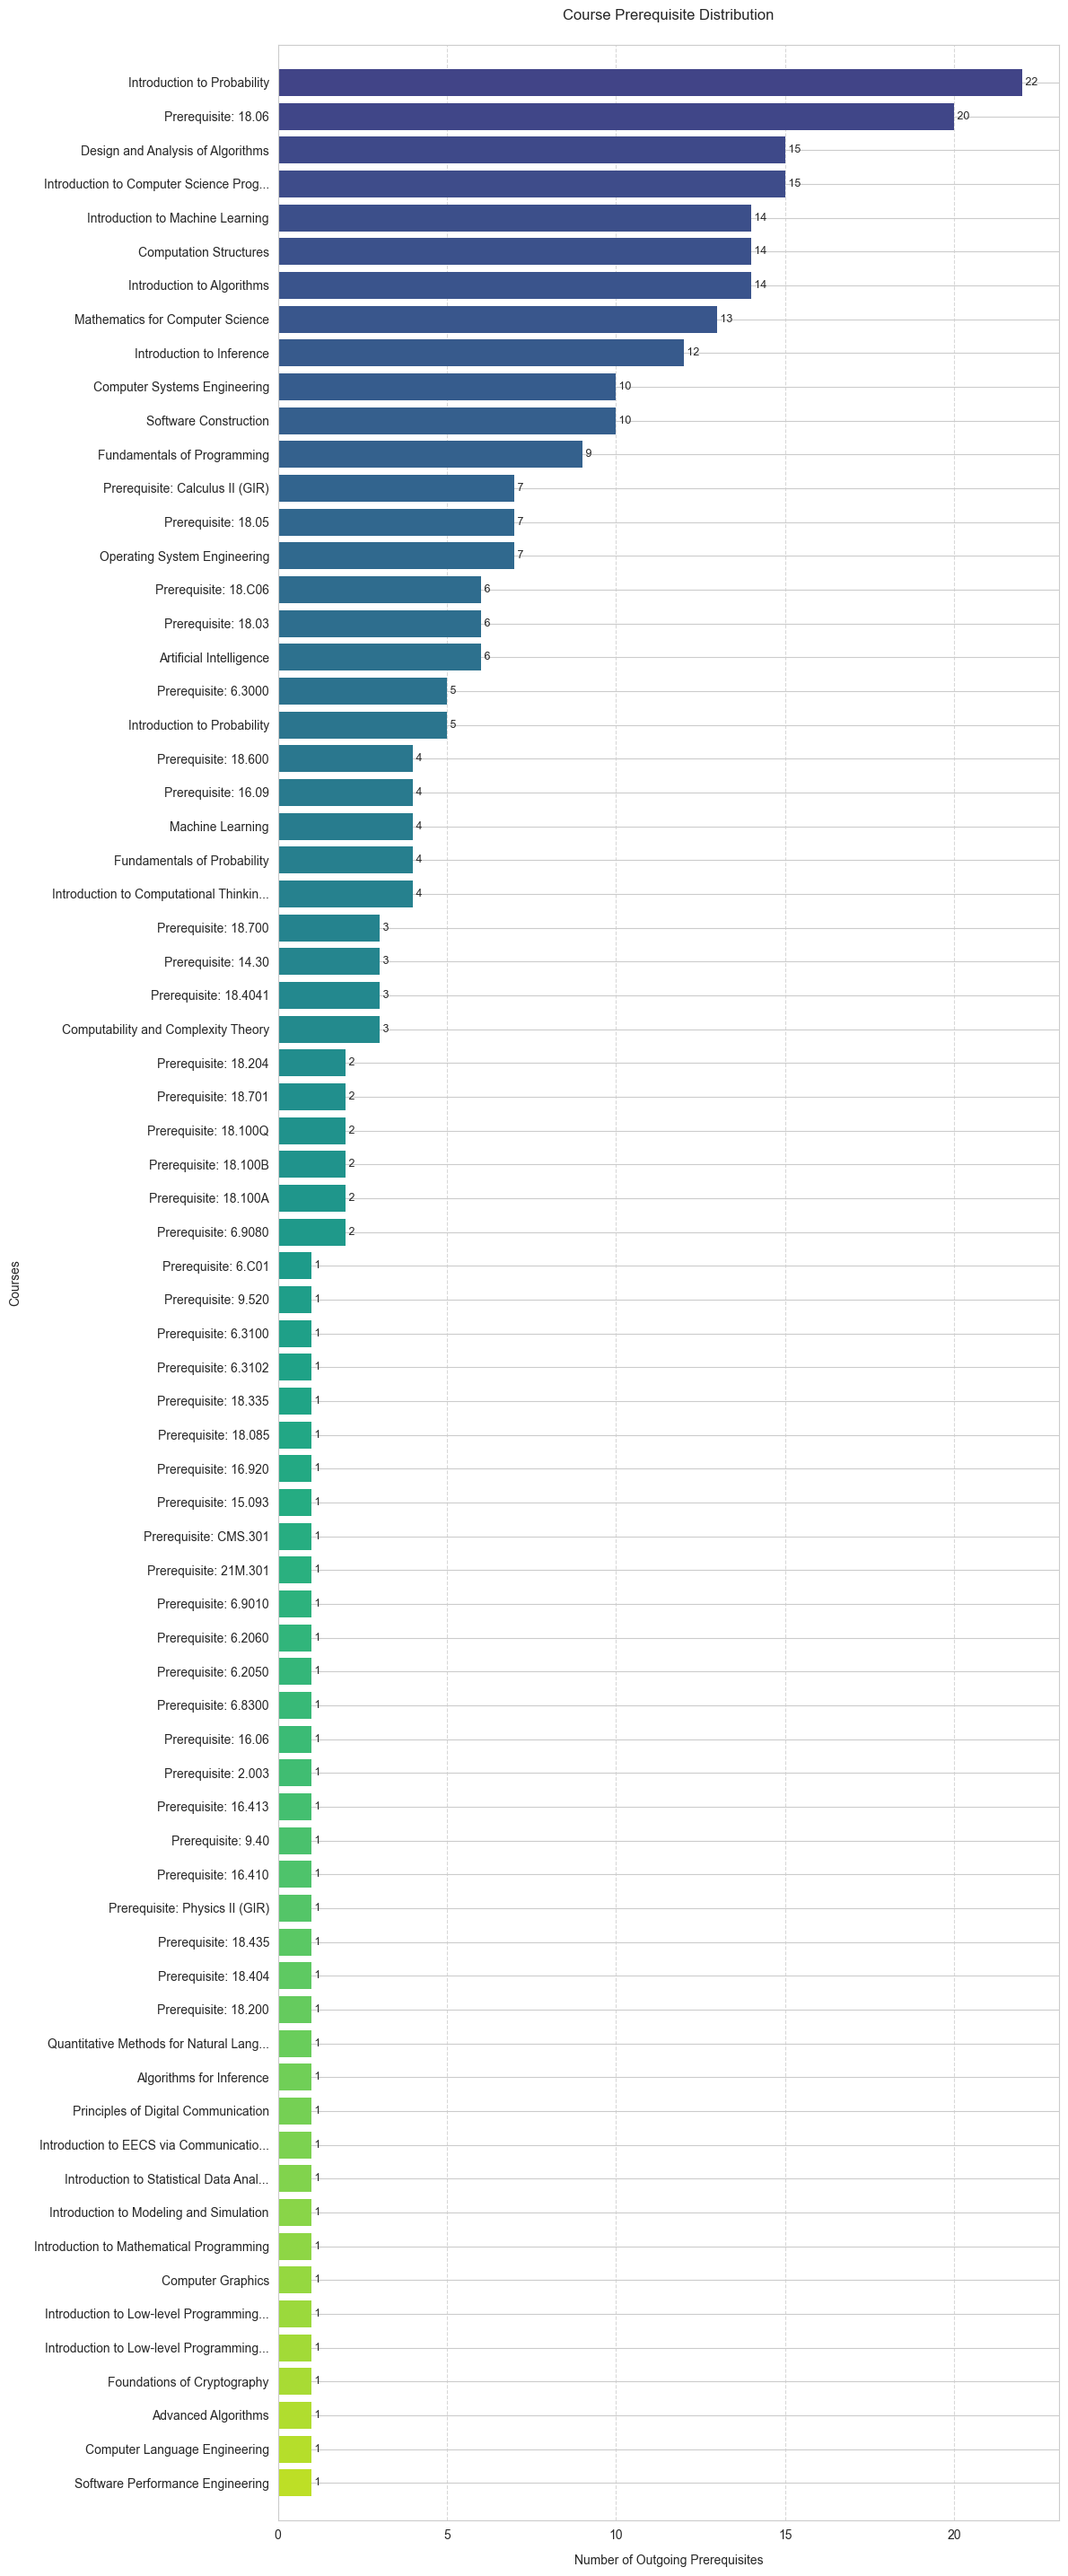

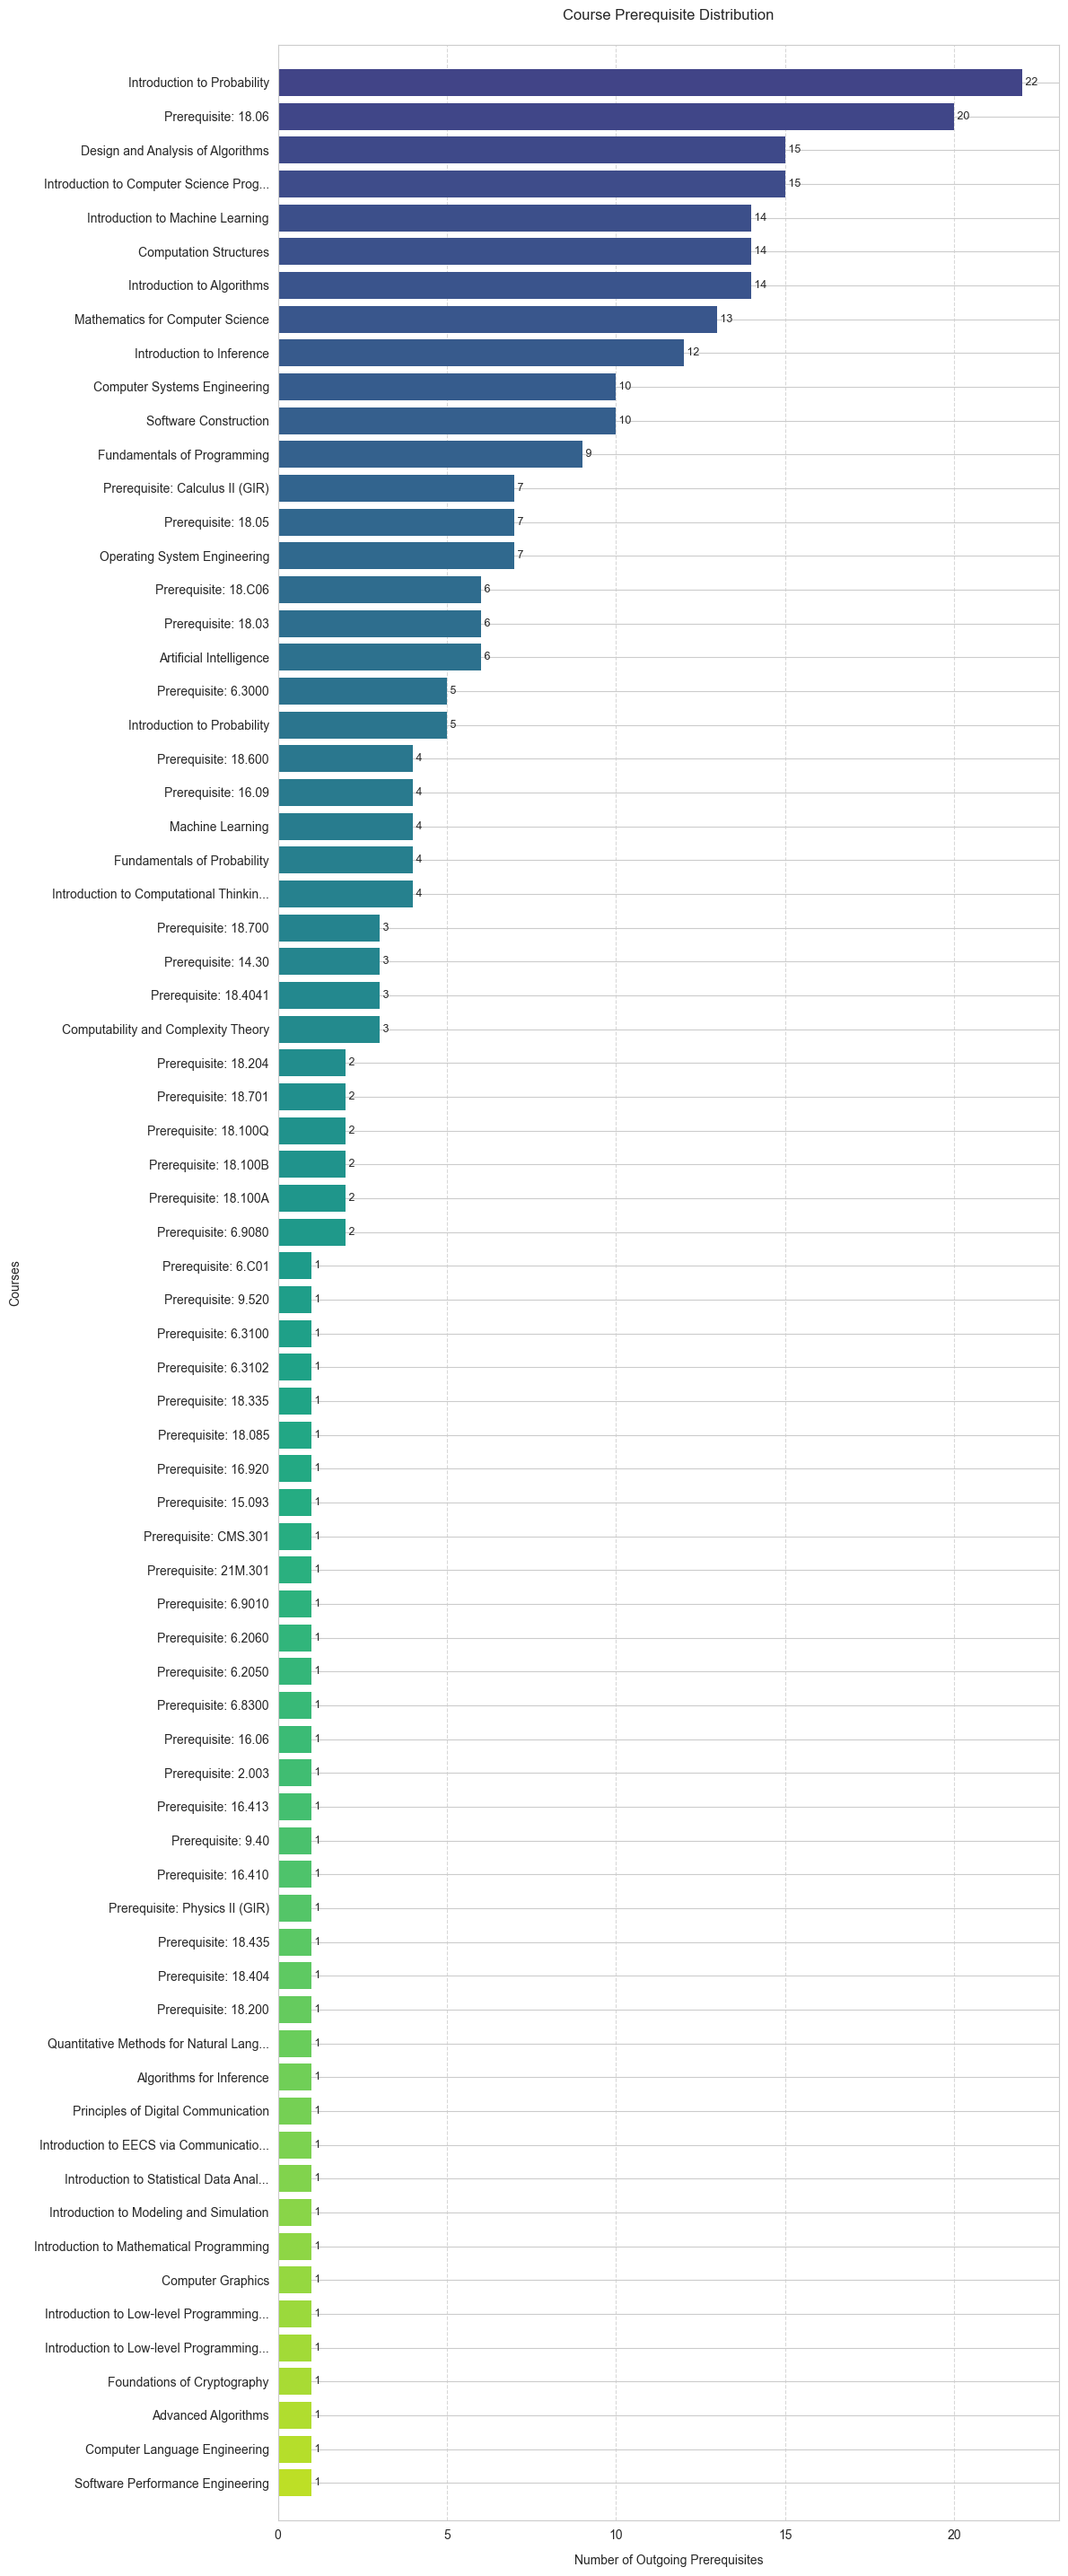

In [68]:
# cs course analysis 
json_file = "cs_courses.json"  # Update with the correct path if needed
output_html = "Graphs/cs_graph.html"

# Generate the course graph
cs_net = create_course_graph(json_file, output_html)
find_unique_longest_paths_in_graph(cs_net)

#make tree graph
json_file = "cs_courses.json"  # Update with the correct path if needed
output_html = "Graphs/cs_tree_graph.html"
# Generate the course graph
cs_net = create_tree_graph(json_file, output_html)

graph_outgoing_edges(cs_net)
